Importing required modules

In [240]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

In the 2 cells below I start cleaning the data. It's a very large dataset. To perform KNN classification we don't need this many data points so we'll only look at 800. The "sample" method picks a random selection of rows

Inspecting the csv file I can see some variables don't look like they'll add much predictive purpose. "fnlwgt" is a weight added by the Census Bureau, capital-gain and capital-loss have large amounts of zeros, and instead of using "education" field there is already a numeric variable "education-num" in the dataset to quantify the education level.

I also chose to remove rows where the occupation/workclass fields were unknown because including these may casue the KNN classifier to pick up incorrect patterns in the data

In [250]:
df = pd.read_csv("adult.csv")
df = df.sample(frac=(800/len(df)))

In [251]:
df = df.drop(labels=["fnlwgt", "education", "capital-gain", "capital-loss"], axis=1)

df = df.drop(df[df.workclass =="?"].index)
df = df.drop(df[df.occupation =="?"].index)

df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
5396,44,Private,15,Never-married,Prof-specialty,Not-in-family,Black,Female,40,United-States,<=50K
19189,17,Private,8,Never-married,Other-service,Own-child,White,Female,8,United-States,<=50K
16744,50,Private,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,40,United-States,<=50K
44457,79,Federal-gov,16,Widowed,Exec-managerial,Not-in-family,White,Male,6,United-States,>50K
33959,46,Local-gov,14,Divorced,Prof-specialty,Not-in-family,White,Female,60,United-States,<=50K


In the cell below I convert the categorical variables in the dataset into numeric using a label encoder

In [252]:
le = LabelEncoder()
categorical_variables = ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country","income"]

categorical_df = df.filter(categorical_variables, axis=1)
categorical_df = categorical_df.apply(le.fit_transform)

for category in categorical_variables:
    df[category] = categorical_df[category]

df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
5396,44,2,15,3,8,1,2,0,40,25,0
19189,17,2,8,3,6,3,4,0,8,25,0
16744,50,2,2,2,1,4,4,1,40,25,0
44457,79,0,16,5,2,1,4,1,6,25,1
33959,46,1,14,0,8,1,4,0,60,25,0


In [254]:
X = df.iloc[:,0:9]  #these are the predictor variables
y = df.iloc[:,10]   #this is my target variable "income", where 0 means <=50K and 1 means >50K

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size =0.2)

Below I standardize my independent variables. Currently there is varying magnitude between the variables so doing this makes the variables comparable

In [255]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

I am now going to loop through varying values for k to find the optimal one. I'll us the f1 score and accuracy of each classifier to do this

In [256]:
f1_scores = []
accuracies = []
for k in range(1,25):
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric="euclidean")
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred))
    accuracies.append(accuracy_score(y_test,y_pred))
    print("k =",k, " -  f1 score = ", round(f1_score(y_test,y_pred),5), " -  accuracy = ", round(accuracy_score(y_test,y_pred),5))

k = 1  -  f1 score =  0.48193  -  accuracy =  0.71711
k = 2  -  f1 score =  0.36364  -  accuracy =  0.76974
k = 3  -  f1 score =  0.57143  -  accuracy =  0.80263
k = 4  -  f1 score =  0.55172  -  accuracy =  0.82895
k = 5  -  f1 score =  0.57576  -  accuracy =  0.81579
k = 6  -  f1 score =  0.53333  -  accuracy =  0.81579
k = 7  -  f1 score =  0.56716  -  accuracy =  0.80921
k = 8  -  f1 score =  0.48387  -  accuracy =  0.78947
k = 9  -  f1 score =  0.52308  -  accuracy =  0.79605
k = 10  -  f1 score =  0.4918  -  accuracy =  0.79605
k = 11  -  f1 score =  0.5  -  accuracy =  0.78947
k = 12  -  f1 score =  0.47458  -  accuracy =  0.79605
k = 13  -  f1 score =  0.51613  -  accuracy =  0.80263
k = 14  -  f1 score =  0.48276  -  accuracy =  0.80263
k = 15  -  f1 score =  0.5  -  accuracy =  0.80263
k = 16  -  f1 score =  0.5  -  accuracy =  0.80263
k = 17  -  f1 score =  0.52459  -  accuracy =  0.80921
k = 18  -  f1 score =  0.50847  -  accuracy =  0.80921
k = 19  -  f1 score =  0.54839  

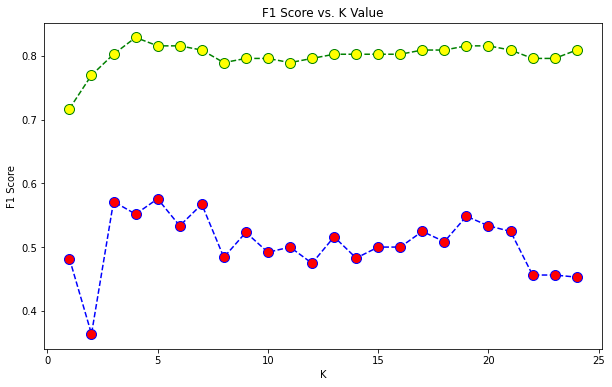

In [257]:
plt.figure(figsize=(10,6))

plt.plot(range(1,25),f1_scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,25),accuracies ,color = 'green',linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('F1 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')

plt.show()

Having run through my data a few times, sampling different rows from the overall dataset that I imported, I conclude that my optimal value for k in the model is 5. When k=5 the model produces the highest (or close to the highest) accuracy and F-score

In [138]:
print(accuracy_score(y_test,y_pred))

0.84375
